In [42]:
import matplotlib.pyplot as plt

In [43]:
import glob
import yaml
import numpy as np
from scipy import optimize
from typing import Optional, Tuple

def plot(
    src_dir: str,
    y_label: str,
    x_label: str,
    title: Optional[str] = None,
    fit: bool = True,
    y_lim: Optional[Tuple[float, float]] = None,
    export_dir: Optional[str] = None
) -> None:
    yamls = glob.glob(f"{src_dir}/**/*.yaml", recursive=True)
    
    x = []
    y = []
    for yaml_path in yamls:
        with open(yaml_path, 'r') as f:
            result = yaml.safe_load(f)
            x.append(result[x_label])
            y.append(result[y_label])
    
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Plot scatter
    if y_lim:
        ax.set_ylim(y_lim[0], y_lim[1])
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.plot(x, y, marker='+', linestyle='')
    
    # Fitting
    if fit:
        x = np.array(x)
        def fit_func(x, a, b):
            return a + b*x
        
        popt, _ = optimize.curve_fit(fit_func, x, y)
        fit_y = fit_func(x, *popt)
        ax.plot(x, fit_y, color='red', label='Fitted curve')
    
    ax.legend()
    if title:
        ax.set_title(title)

    if export_dir:
        fig.savefig(f'{export_dir}/{y_label.replace(" ", "_")}_{x_label.replace(" ", "_")}.png')
    plt.show()

# Algorithm 1 & 2

In [44]:
x_label_choice_for_alg12 = {
    'Number of nodes',
    'Number of edges',
    'Number of timer driven nodes',
    'Number of join nodes',
    'Number of tail nodes',
    'Number of tail and join node pairs',
}

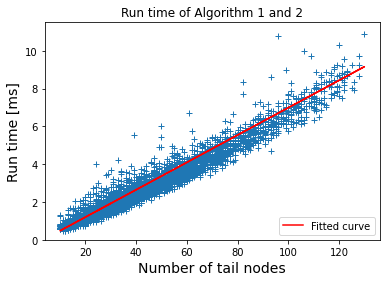

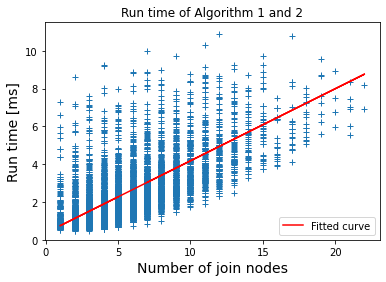

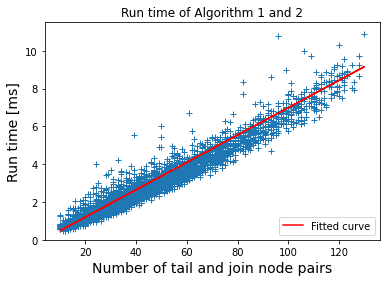

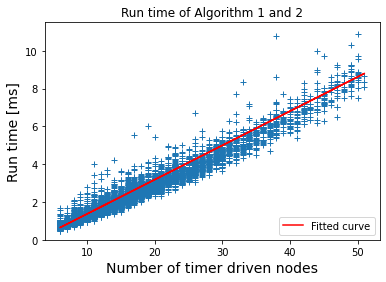

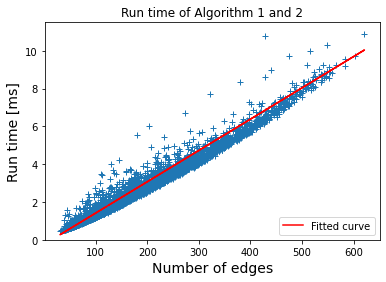

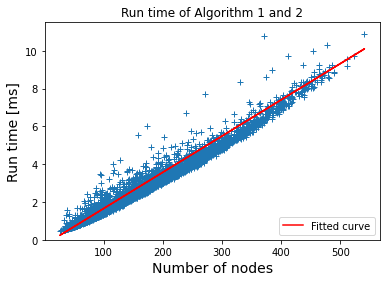

In [45]:
### Run time

for x_label in x_label_choice_for_alg12:
    plot(src_dir='./results/run_time/alg12/',
         y_label='Run time [ms]',
         x_label=x_label,
         title='Run time of Algorithm 1 and 2',
         y_lim=(0, 11.5),
         export_dir='./results/figures/alg12/run_time/')

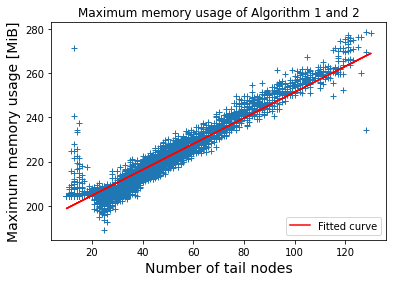

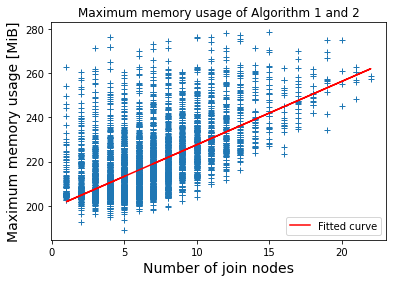

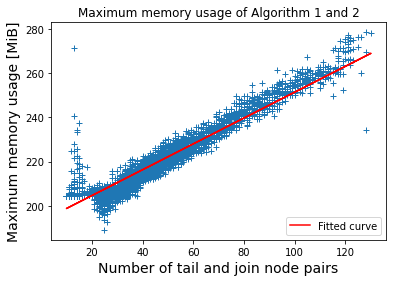

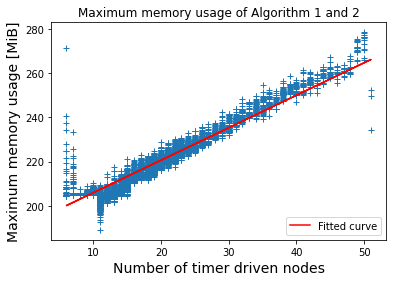

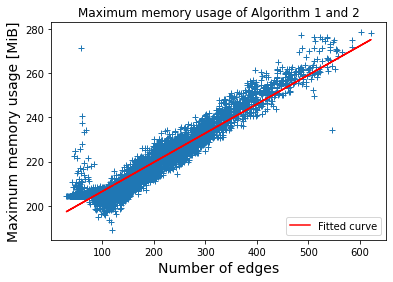

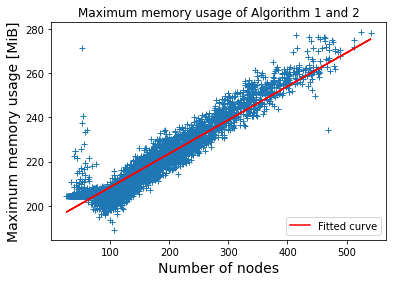

In [46]:
### Maximum memory usage

for x_label in x_label_choice_for_alg12:
    plot(src_dir='./results/memory_usage/alg12/',
         y_label='Maximum memory usage [MiB]',
         x_label=x_label,
         title='Maximum memory usage of Algorithm 1 and 2',
         export_dir='./results/figures/alg12/memory_usage/')

# Algorithm 3

In [47]:
x_label_choice_for_alg3 = {
    'Number of nodes',
    'Number of edges',
    'Number of timer driven nodes',
    'Number of join nodes',
    'Number of tail nodes',
    'Number of sub DAGs',
    'Number of tail and join node pairs',
    'Number of pairs of tail node jobs and join node jobs',
    'Number of jobs',
    'HP'
}

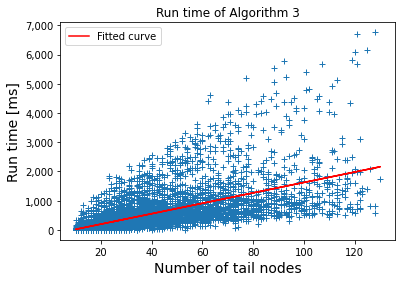

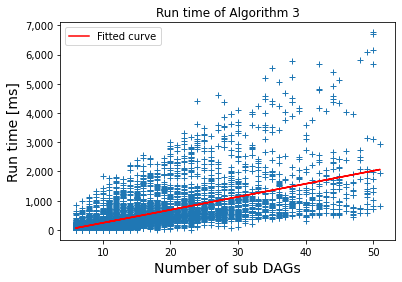

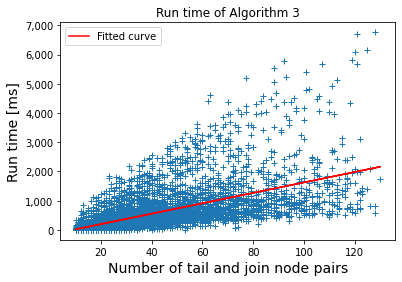

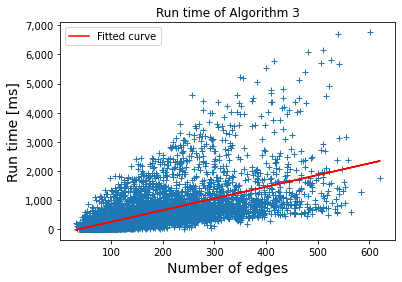

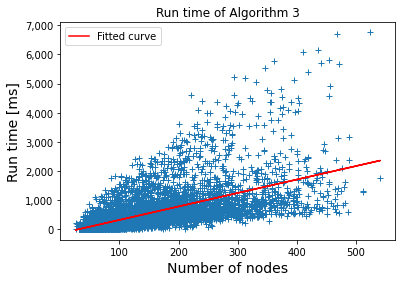

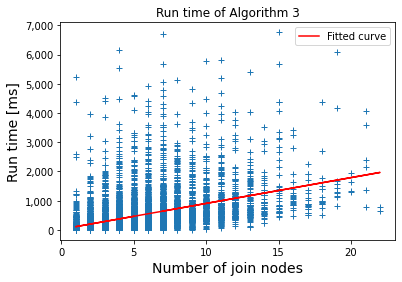

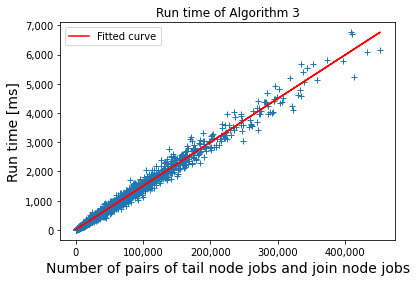

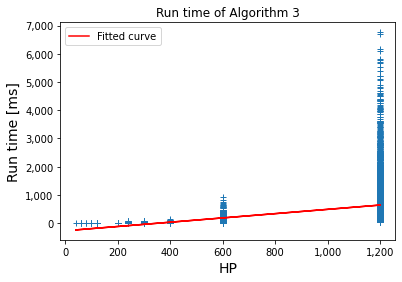

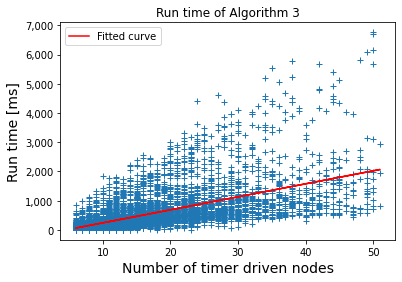

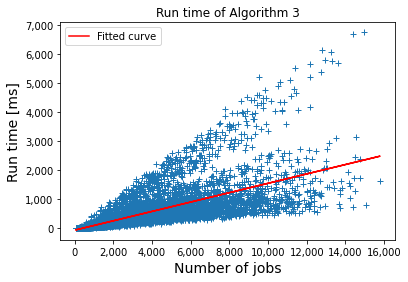

In [48]:
### Run time

for x_label in x_label_choice_for_alg3:
    plot(src_dir='./results/run_time/alg3/',
         y_label='Run time [ms]',
         x_label=x_label,
         title='Run time of Algorithm 3',
         export_dir='./results/figures/alg3/run_time/')

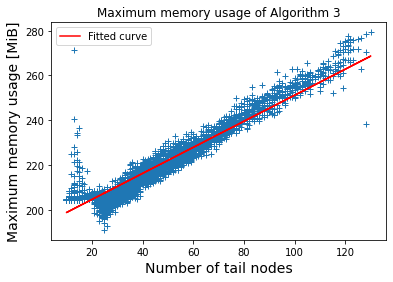

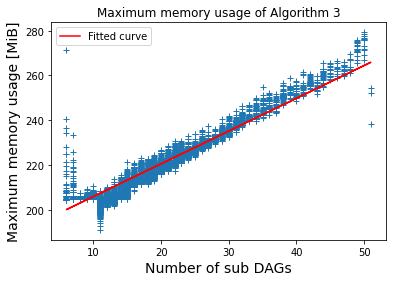

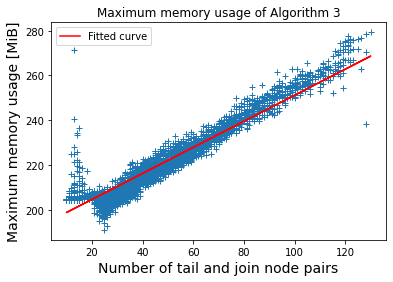

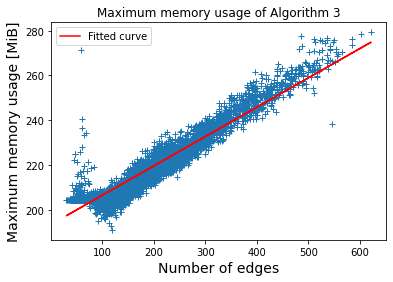

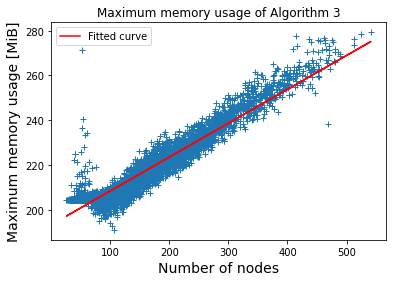

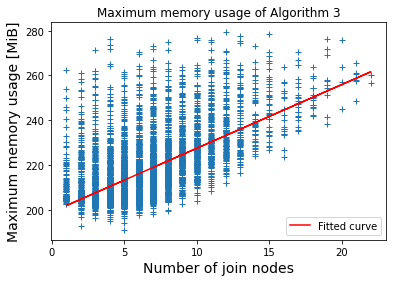

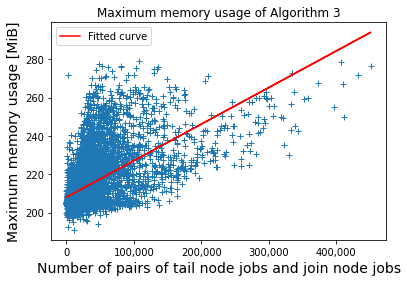

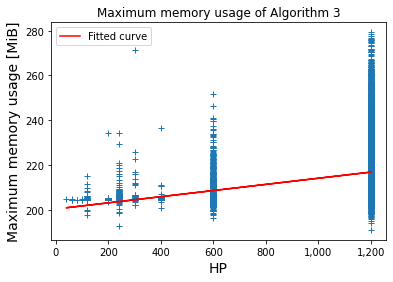

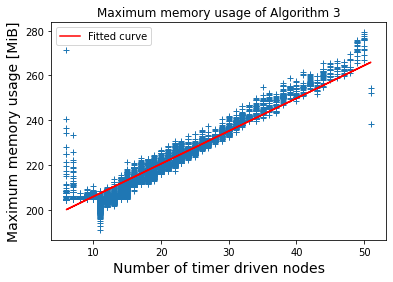

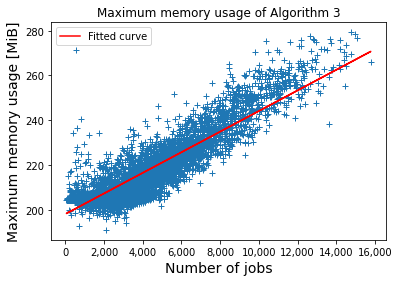

In [49]:
### Maximum memory usage

for x_label in x_label_choice_for_alg3:
    plot(src_dir='./results/memory_usage/alg3/',
         y_label='Maximum memory usage [MiB]',
         x_label=x_label,
         title='Maximum memory usage of Algorithm 3',
         export_dir='./results/figures/alg3/memory_usage/')